In [1]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings

import mlflow
from mlflow.models import infer_signature
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
from itertools import product  # Para probar combinaciones de hiperparámetros
import seaborn as sns

In [6]:
import pandas as pd

url = 'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/a9fdd19a-bc35-4f0e-8bdd-87e635e9834e/download/datos-meteorologicos-diarios-guiais01-2025.csv'
df = pd.read_csv(url)
df.head()

,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,total,NaN
1,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,media,2.51875
2,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,minimo,0.80000
3,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,maximo,5.70000
4,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-02,total,NaN


In [7]:
urls = [
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/a9fdd19a-bc35-4f0e-8bdd-87e635e9834e/download/datos-meteorologicos-diarios-guiais01-2025.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/5bb5acac-5d04-4d6d-8f3e-c044173428b1/download/datos-meteorologicos-diarios-guiais01-2024.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/4384d836-cb55-4ae0-888b-6c5cb738ca46/download/datos-meteorologicos-diarios-guiais01-2023.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/0dda533e-be05-4d14-918a-816c78f5ec82/download/datos-meteorologicos-diarios-guiais01-2022.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/5da8911b-789c-4bd8-87b9-2e664f543c6e/download/datos-meteorologicos-diarios-guiais01-2021.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/025c53fa-71f9-4cd1-a800-97a61800ae95/download/datos-meteorologicos-diarios-guiais01-2020.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/79b3f918-0e25-4eae-b657-33f1affc261f/download/datos-meteorologicos-diarios-guiais01-2019.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/2db56505-52ef-4b51-a203-af10185be6cc/download/datos-meteorologicos-diarios-guiais01-2018.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/9da19568-b87a-42b5-8b8d-c93a910b21fb/download/datos-meteorologicos-diarios-guiais01-2017.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/28cd14b2-08fe-463f-a5b1-75d38d30cdc3/download/datos-meteorologicos-diarios-guiais01-2016.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/9f9326ef-992d-4cd2-84f4-40f1c94cf39c/download/datos-meteorologicos-diarios-guiais01-2015.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/66798aa2-bb0f-4e44-bc2c-8094484690fd/download/datos-meteorologicos-diarios-guiais01-2014.csv',
    'https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/786c1aab-b386-4b4f-80b7-0c620048082c/download/datos-meteorologicos-diarios-guiais01-2013.csv'
]

In [8]:
df= pd.DataFrame()
for url in urls:
    df1= pd.read_csv(url)
    df = pd.concat([df, df1], axis=0)
    print(url)

https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/a9fdd19a-bc35-4f0e-8bdd-87e635e9834e/download/datos-meteorologicos-diarios-guiais01-2025.csv
https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/5bb5acac-5d04-4d6d-8f3e-c044173428b1/download/datos-meteorologicos-diarios-guiais01-2024.csv
https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/4384d836-cb55-4ae0-888b-6c5cb738ca46/download/datos-meteorologicos-diarios-guiais01-2023.csv
https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/0dda533e-be05-4d14-918a-816c78f5ec82/download/datos-meteorologicos-diarios-guiais01-2022.csv
https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/5da8911b-789c-4bd8-87b9-2e664f543c6e/download/datos-meteorologicos-diarios-guiais01-2021.csv
https://datos.tenerife.es/ckan/dataset/12810866-bd1b-47d7-b66e-0547d340abc8/resource/025c53fa-71f9-4cd1-a800-9

In [9]:
df.head()

,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,total,NaN
1,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,media,2.51875
2,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,minimo,0.80000
3,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-01,maximo,5.70000
4,5,GUIAIS01,405,WSP,Velocidad del viento,2025-01-02,total,NaN


In [10]:
#veo que columnas tiene el dataset
df.columns

Index(['estacion_id', 'estacion_nombre', 'sensor_id', 'sensor_alias',
       'sensor_nombre', 'fecha_observacion', 'metrica', 'valor'],
      dtype='object')

In [11]:
#veo los tipos de datos
df.dtypes


estacion_id            int64
estacion_nombre       object
sensor_id              int64
sensor_alias          object
sensor_nombre         object
fecha_observacion     object
metrica               object
valor                float64
dtype: object

In [12]:
# cambio fecha_observacion a tipo fecha
df['fecha_observacion'] = pd.to_datetime(df['fecha_observacion'])

In [13]:
#ordeno por fecha
df = df.sort_values(by='fecha_observacion')

In [14]:
#veo los años que tengo
df['fecha_observacion'].dt.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025], dtype=int32)

In [15]:
#veo los sensores que tengo
df['sensor_nombre'].unique()

array(['Radiación solar', 'Temperatura', 'Velocidad del viento',
       'Precipitación', 'Humedad relativa'], dtype=object)

In [16]:
#para este caso voy a trabajar con el sensor de temperatura
df_temp = df[df['sensor_nombre'] == 'Temperatura']
df_temp.reset_index(drop=True, inplace=True)
df_temp.head()


,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,media,15.0
1,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,total,NaN
2,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,minimo,13.2
3,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,maximo,17.7
4,5,GUIAIS01,407,TEMP,Temperatura,2013-01-02,maximo,19.2


In [17]:
df_temp

,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,media,15.000000
1,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,total,NaN
2,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,minimo,13.200000
3,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,maximo,17.700000
4,5,GUIAIS01,407,TEMP,Temperatura,2013-01-02,maximo,19.200000
...,...,...,...,...,...,...,...,...
17731,5,GUIAIS01,407,TEMP,Temperatura,2025-02-19,media,16.234028
17732,5,GUIAIS01,407,TEMP,Temperatura,2025-02-20,minimo,13.400000
17733,5,GUIAIS01,407,TEMP,Temperatura,2025-02-20,maximo,19.000000
17734,5,GUIAIS01,407,TEMP,Temperatura,2025-02-20,total,NaN


In [18]:
#me quedo unicamente con la metrica media
df_temp = df_temp[df_temp['metrica'] == 'media']
df_temp.reset_index(drop=True, inplace=True)

In [19]:
df_temp

,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,407,TEMP,Temperatura,2013-01-01,media,15.000000
1,5,GUIAIS01,407,TEMP,Temperatura,2013-01-02,media,14.870900
2,5,GUIAIS01,407,TEMP,Temperatura,2013-01-03,media,15.120000
3,5,GUIAIS01,407,TEMP,Temperatura,2013-01-04,media,14.994600
4,5,GUIAIS01,407,TEMP,Temperatura,2013-01-05,media,14.667500
...,...,...,...,...,...,...,...,...
4429,5,GUIAIS01,407,TEMP,Temperatura,2025-02-16,media,15.550694
4430,5,GUIAIS01,407,TEMP,Temperatura,2025-02-17,media,15.544444
4431,5,GUIAIS01,407,TEMP,Temperatura,2025-02-18,media,17.752777
4432,5,GUIAIS01,407,TEMP,Temperatura,2025-02-19,media,16.234028


In [20]:
# no tiene una abundancia de datos, pero suficiente para hacer un analisis
df_temp['fecha_observacion'].dt.year.value_counts()

fecha_observacion
2016    366
2020    366
2024    366
2013    365
2014    365
2015    365
2017    365
2018    365
2019    365
2021    365
2022    365
2023    365
2025     51
Name: count, dtype: int64

In [21]:
mlflow.set_tracking_uri("http://localhost:8080")

In [22]:
#me quedo unicamente con fecha y valor
df_temp = df_temp[['fecha_observacion', 'valor']]

In [23]:
df_temp['offset days']= df_temp.index
df_temp['valor_previo'] = df_temp['valor'].shift(1)
df_temp['valor_diff']=df_temp['valor_previo'].diff()
df_temp['dia_semana'] = df_temp['fecha_observacion'].dt.dayofweek
df_temp['mes'] = df_temp['fecha_observacion'].dt.month

/var/folders/sp/x455bs6n6vqbnk9zj20_q5fh0000gn/T/ipykernel_21886/3942806323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['offset days']= df_temp.index
/var/folders/sp/x455bs6n6vqbnk9zj20_q5fh0000gn/T/ipykernel_21886/3942806323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['valor_previo'] = df_temp['valor'].shift(1)
/var/folders/sp/x455bs6n6vqbnk9zj20_q5fh0000gn/T/ipykernel_21886/3942806323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [24]:
for i, día in enumerate(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]):
    df_temp[día] = df_temp['dia_semana'].apply(lambda x: 1 if (x==i) else 0)

In [25]:
# hago para el mes con el nombre como arriba
for i, mes in enumerate(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre"]):
    df_temp[mes] = df_temp['mes'].apply(lambda x: 1 if (x==i+1) else 0)


In [26]:
#temperatura media ultimos 7 dias y 30 dias
df_temp['media_7_dias'] = df_temp['valor'].rolling(window=7).mean()
df_temp['media_30_dias'] = df_temp['valor'].rolling(window=30).mean()

In [27]:
#elimino la columna mes y la columna dia_semana
df_temp = df_temp.drop(columns=['mes', 'dia_semana'])

In [28]:
df_temp.columns

Index(['fecha_observacion', 'valor', 'offset days', 'valor_previo',
       'valor_diff', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes',
       'Sábado', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
       'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'media_7_dias',
       'media_30_dias'],
      dtype='object')

In [29]:
#remuevo los valores nulos
df_temp = df_temp.dropna()
df_temp.reset_index(drop=True, inplace=True)

In [30]:
# separo en X,y
X = df_temp.drop(columns=['valor', 'fecha_observacion'])
y = df_temp['valor']

In [31]:
X

,offset days,valor_previo,valor_diff,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,media_7_dias,media_30_dias
0,29,16.825000,2.261700,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,15.738200,14.980760
1,30,19.453300,2.628300,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,16.431657,15.113150
2,31,18.971700,-0.481600,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,17.074400,15.252593
3,32,19.054200,0.082500,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,17.389757,15.327927
4,33,17.380000,-1.674200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17.250600,15.311663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,4429,16.391666,0.854861,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.960317,15.991509
4340,4430,15.550694,-0.840972,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15.996230,15.985444
4341,4431,15.544444,-0.006250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,16.230357,16.055143
4342,4432,17.752777,2.208333,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,16.197916,16.063893


In [32]:
#max columns
pd.set_option('display.max_columns', None)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [34]:
X_test

,offset days,valor_previo,valor_diff,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,media_7_dias,media_30_dias
3475,3565,24.627100,-0.616000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,22.087914,21.483730
3476,3566,20.573600,-4.053500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,22.193471,21.476253
3477,3567,20.865300,0.291700,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22.272943,21.456253
3478,3568,20.791700,-0.073600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22.272443,21.417063
3479,3569,20.600700,-0.191000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21.844157,21.372640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,4429,16.391666,0.854861,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.960317,15.991509
4340,4430,15.550694,-0.840972,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.996230,15.985444
4341,4431,15.544444,-0.006250,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16.230357,16.055143
4342,4432,17.752777,2.208333,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16.197916,16.063893


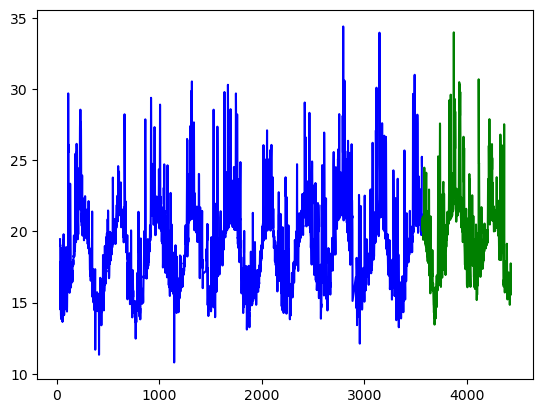

In [292]:
#hago un plot de x_train y x_test
plt.plot(X_train['offset days'], y_train, color='blue', label='Train')
plt.plot(X_test['offset days'], y_test, color='green', label='Test')

In [47]:
import mlflow

# Restore the deleted experiment
experiment_name = "Comparacion_Modelos_Hiperparametros"
experiment = mlflow.get_experiment_by_name(experiment_name)

if experiment and experiment.lifecycle_stage == "deleted":
    mlflow.tracking.MlflowClient().restore_experiment(experiment.experiment_id)

# Set the experiment
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/142334081949881656', creation_time=1740645078126, experiment_id='142334081949881656', last_update_time=1740661635243, lifecycle_stage='active', name='Comparacion_Modelos_Hiperparametros', tags={}>

In [49]:
# 2️⃣ Definir los modelos y sus hiperparámetros a probar
hiperparametros = {
    "Random Forest": [
        {"n_estimators": 50, "max_depth": 5},
        {"n_estimators": 100, "max_depth": 10},
    ],
    "XGBoost": [
        {"n_estimators": 50, "learning_rate": 0.1},
        {"n_estimators": 100, "learning_rate": 0.05},
    ],
    "LightGBM": [
        {"n_estimators": 50, "learning_rate": 0.05},
        {"n_estimators": 100, "learning_rate": 0.1},
    ],
    "CatBoost": [
        {"iterations": 50, "learning_rate": 0.05, "depth": 6},
        {"iterations": 100, "learning_rate": 0.1, "depth": 6},
    ],
    "MLP": [
        {"hidden_layer_sizes": (64, 32), "max_iter": 100},
        {"hidden_layer_sizes": (128, 64), "max_iter": 200},
    ],
    "SVR": [
        {"C": 1.0, "epsilon": 0.1},
        {"C": 10.0, "epsilon": 0.05},
    ]
}

# 3️⃣ Configurar MLflow
mlflow.set_experiment("Modelos_temp")

# 4️⃣ Entrenar modelos con distintas configuraciones
for nombre, lista_parametros in hiperparametros.items():
    for params in lista_parametros:
        with mlflow.start_run(run_name=f"{nombre} - {params}"):
            print(f"Entrenando {nombre} con {params}...")

            # Crear modelo con los parámetros actuales
            if nombre == "Regresión Lineal":
                modelo = LinearRegression()
            elif nombre == "Random Forest":
                modelo = RandomForestRegressor(**params, random_state=42)
            elif nombre == "XGBoost":
                modelo = XGBRegressor(**params, random_state=42)
            elif nombre == "LightGBM":
                modelo = lgb.LGBMRegressor(**params, random_state=42)
            elif nombre == "CatBoost":
                modelo = CatBoostRegressor(**params, random_state=42, verbose=0)
            elif nombre == "MLP":
                modelo = MLPRegressor(**params, random_state=42)
            elif nombre == "SVR":
                modelo = SVR(**params)

            # Entrenar modelo
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)

            # Calcular métricas
            mae = mean_absolute_error(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)

            # Registrar en MLflow
            mlflow.log_params(params)  # Guarda los hiperparámetros usados
            mlflow.log_metric("MAE", mae)
            mlflow.log_metric("RMSE", rmse)
            mlflow.log_metric("R2", r2)
            mlflow.sklearn.log_model(modelo, f"modelo_{nombre}")

            print(f"{nombre} con {params} registrado | R2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

print("¡Entrenamiento completado!")


Entrenando Random Forest con {'n_estimators': 50, 'max_depth': 5}...


2025/02/27 14:16:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest con {'n_estimators': 50, 'max_depth': 5} registrado | R2: 0.8218, MAE: 0.8759, RMSE: 1.3232
🏃 View run Random Forest - {'n_estimators': 50, 'max_depth': 5} at: http://localhost:8080/#/experiments/460161067001223350/runs/f4fb2ffbf18c41a598a9d38514babc1b
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando Random Forest con {'n_estimators': 100, 'max_depth': 10}...


2025/02/27 14:16:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest con {'n_estimators': 100, 'max_depth': 10} registrado | R2: 0.8338, MAE: 0.8620, RMSE: 1.2776
🏃 View run Random Forest - {'n_estimators': 100, 'max_depth': 10} at: http://localhost:8080/#/experiments/460161067001223350/runs/1e0e0f0390b549cb8870ed4624d76baf
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando XGBoost con {'n_estimators': 50, 'learning_rate': 0.1}...


2025/02/27 14:16:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost con {'n_estimators': 50, 'learning_rate': 0.1} registrado | R2: 0.8289, MAE: 0.8686, RMSE: 1.2962
🏃 View run XGBoost - {'n_estimators': 50, 'learning_rate': 0.1} at: http://localhost:8080/#/experiments/460161067001223350/runs/5f02fbf57b7a422cadc19055dd09e6ee
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando XGBoost con {'n_estimators': 100, 'learning_rate': 0.05}...


2025/02/27 14:16:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBoost con {'n_estimators': 100, 'learning_rate': 0.05} registrado | R2: 0.8272, MAE: 0.8752, RMSE: 1.3028
🏃 View run XGBoost - {'n_estimators': 100, 'learning_rate': 0.05} at: http://localhost:8080/#/experiments/460161067001223350/runs/273059c72b49442fa5fbc59b719ce452
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando LightGBM con {'n_estimators': 50, 'learning_rate': 0.05}...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 3516, number of used features: 22
[LightGBM] [Info] Start training from score 18.917042


2025/02/27 14:16:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LightGBM con {'n_estimators': 50, 'learning_rate': 0.05} registrado | R2: 0.8188, MAE: 0.8717, RMSE: 1.3341
🏃 View run LightGBM - {'n_estimators': 50, 'learning_rate': 0.05} at: http://localhost:8080/#/experiments/460161067001223350/runs/a51570d68bed492180826b37b02a342b
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando LightGBM con {'n_estimators': 100, 'learning_rate': 0.1}...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 3516, number of used features: 22
[LightGBM] [Info] Start training from score 18.917042


2025/02/27 14:16:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LightGBM con {'n_estimators': 100, 'learning_rate': 0.1} registrado | R2: 0.8223, MAE: 0.8838, RMSE: 1.3214
🏃 View run LightGBM - {'n_estimators': 100, 'learning_rate': 0.1} at: http://localhost:8080/#/experiments/460161067001223350/runs/cdb06d365a7743abb5f9ed8dbc40e453
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando CatBoost con {'iterations': 50, 'learning_rate': 0.05, 'depth': 6}...


2025/02/27 14:16:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoost con {'iterations': 50, 'learning_rate': 0.05, 'depth': 6} registrado | R2: 0.7969, MAE: 0.9182, RMSE: 1.4124
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/460161067001223350/runs/ebc0b59496db4367ab8361cd2266feb3
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando CatBoost con {'iterations': 100, 'learning_rate': 0.1, 'depth': 6}...


2025/02/27 14:16:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoost con {'iterations': 100, 'learning_rate': 0.1, 'depth': 6} registrado | R2: 0.8357, MAE: 0.8520, RMSE: 1.2704
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/460161067001223350/runs/1a448598de574f2ca5e5a55fe8f17e5e
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando MLP con {'hidden_layer_sizes': (64, 32), 'max_iter': 100}...


2025/02/27 14:17:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLP con {'hidden_layer_sizes': (64, 32), 'max_iter': 100} registrado | R2: 0.4565, MAE: 2.0746, RMSE: 2.3105
🏃 View run MLP - {'hidden_layer_sizes': (64, 32), 'max_iter': 100} at: http://localhost:8080/#/experiments/460161067001223350/runs/9d47109e4eb54e3690b373aa839f5a63
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando MLP con {'hidden_layer_sizes': (128, 64), 'max_iter': 200}...


2025/02/27 14:17:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLP con {'hidden_layer_sizes': (128, 64), 'max_iter': 200} registrado | R2: 0.7774, MAE: 1.1704, RMSE: 1.4786
🏃 View run MLP - {'hidden_layer_sizes': (128, 64), 'max_iter': 200} at: http://localhost:8080/#/experiments/460161067001223350/runs/dbe89c886caa4da3b66b281686077c1c
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando SVR con {'C': 1.0, 'epsilon': 0.1}...


2025/02/27 14:17:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR con {'C': 1.0, 'epsilon': 0.1} registrado | R2: -0.0084, MAE: 2.4059, RMSE: 3.1473
🏃 View run SVR - {'C': 1.0, 'epsilon': 0.1} at: http://localhost:8080/#/experiments/460161067001223350/runs/1dfaebddd0534f40815ba802224d0fbe
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
Entrenando SVR con {'C': 10.0, 'epsilon': 0.05}...


2025/02/27 14:17:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVR con {'C': 10.0, 'epsilon': 0.05} registrado | R2: -0.4000, MAE: 2.9880, RMSE: 3.7084
🏃 View run SVR - {'C': 10.0, 'epsilon': 0.05} at: http://localhost:8080/#/experiments/460161067001223350/runs/9849a411527f4ae2b9c575031f80c7d2
🧪 View experiment at: http://localhost:8080/#/experiments/460161067001223350
¡Entrenamiento completado!


In [ ]:
# me quedo con el 

In [52]:
# 3️⃣ Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    "iterations": [50, 100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [5, 6, 10],
}


# 4️⃣ Configurar MLflow
mlflow.set_experiment("Optimización_CatBoost")

# 5️⃣ Ejecutar el entrenamiento para cada combinación de parámetros
print("Entrenando con diferentes combinaciones de parámetros y registrando en MLflow...")

# Iterar sobre todas las combinaciones de parámetros
for params in [dict(zip(param_grid, x)) for x in itertools.product(*param_grid.values())]:

    # Crear el modelo con los parámetros actuales
    modelo = CatBoostRegressor(random_state=42, verbose=0, **params)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # 6️⃣ Evaluar el modelo en el conjunto de prueba
    y_pred = modelo.predict(X_test)

    # 7️⃣ Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # 8️⃣ Registrar parámetros y métricas en MLflow
    mlflow.end_run()  # End any active run before starting a new one
    with mlflow.start_run(run_name=f"Modelo CatBoost - {params}"):
        # Registrar los hiperparámetros
        mlflow.log_params(params)
        

        # Registrar el modelo entrenado
        input_example = X_train[:5]  # Provide an input example
        mlflow.catboost.log_model(modelo, f"modelo_catboost_{params}", input_example=input_example)

 
        # Registrar las métricas
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2", r2)

        # Registrar el modelo entrenado
        mlflow.catboost.log_model(modelo, f"modelo_catboost_{params}")

print("¡Entrenamiento y registro completado!")

Entrenando con diferentes combinaciones de parámetros y registrando en MLflow...


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:19:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/f48844413e52421e91727fcfc1c228a2
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/627e2cfd44c949d4a043fec525ac0124
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/add3ad5903cb42969edfbc3c205d6bd0
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/fbff8c0110374dc6a1da29f56de962f0
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/ea7d109f26cc44978122a71aeefb4d68
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/2080bc4ed5bb46e3bec7e45133b99a06
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:19:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/523c6ec358324014928bee49ccb587e4
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/29b106b0a5bc4a4c8513440ea4607377
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/b9e5e7c40e2342afb57149d0cd28b235
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/6e3e3252fa3a4b1782e7423b05a00bd7
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/3a0bdc5b887f4f56b85faf11465fc1a5
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:20:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/92698af405014d6b88f4168fcded663d
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/f3d4d898c6b245e9b88f652b1979840c
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/373aed8c6a46418ea2728f0466a21f66
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:20:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/8e384aa71edc4a8dbd19679f33dc150e
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/30bab6142ca349d8aa1da0e6222967d7
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/e9fed5683fbd402aa7fec1f976402fae
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:20:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/b176cdfb52834d9ba1f2e3bbc1933b86
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/862657ff0d5340fbb8118686172f076e
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/5b7e6d5566064c82aa8aa4f69a919ff1
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:20:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/1e85e0715104411b8950f3168aafe092
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/9e5360e02a5849499989a0d8a0f07ca1
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:20:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/073deb8119c545458aaa7da147b46235
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/opt/anaconda3/lib/python3.12/site-packages/mlfl

🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/de87eda4fdf443698ef1c242c1d45ef7
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


2025/02/27 14:21:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/80b8d8e8f607400eae39de86b5e043f8
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/80269c3aa9544a08af50e0c182e5f4d7
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/1d790a5db1d044ddadba875574c092c8
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/94041a3189034b46ae9b1ef66f51b481
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/9b3c8577c96c48f9ae668a8202f7677e
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/4fcce67095174eac9c7882af3378027a
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/d742d63bf6ea433a96d77e1e206becdf
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/1669f0665e344f58ad8d8adf1d36c4a3
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/b17f2fae8cac4f21bd14535b95d76df9
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/15b61e0f3f684b68997cee1b44343349
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/99f370b82b1d4c7b804f4d4d71a2e2c5
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/0ede803b36d64f2199d044e09005085a
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/7641357152db46508c8c7f678d338e85
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:21:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/db7ced2cb32340cd80367c9f1fb208da
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/f80b0c4aab404e909ff27eb38afb5370
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/818af418585c4d5e9d70216d692aa337
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/eaf0dcc68a774bf2931e5d2be3464607
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/dad61d427a2642409f0e86a39a822585
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/718553704951825850/runs/6ee2a9407f164bc1a560b9d18861ec4e
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/718553704951825850/runs/c7461adbf4584023837d88a8e1fc1350
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850


/opt/anaconda3/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/02/27 14:22:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/718553704951825850/runs/f63a6e0a9e0346788b5dc13ac323125d
🧪 View experiment at: http://localhost:8080/#/experiments/718553704951825850
¡Entrenamiento y registro completado!


In [38]:
X_test

,offset days,valor_previo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,media_7_dias,media_30_dias
3475,3565,24.627100,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,22.087914,21.483730
3476,3566,20.573600,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,22.193471,21.476253
3477,3567,20.865300,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,22.272943,21.456253
3478,3568,20.791700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,22.272443,21.417063
3479,3569,20.600700,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21.844157,21.372640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,4429,16.391666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.960317,15.991509
4340,4430,15.550694,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15.996230,15.985444
4341,4431,15.544444,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16.230357,16.055143
4342,4432,17.752777,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16.197916,16.063893


In [36]:
# el modelo elegido fue el de CatBoost con los siguientes hiperparametros
# Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6}
params = {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6}

# Crear un nuevo modelo con los hiperparámetros seleccionados
modelo = CatBoostRegressor(random_state=42, verbose=0, **params)
#guardo el modelo
modelo.fit(X_train, y_train)
modelo.save_model("modelo_catboost_temperatura")

In [185]:
df_lluvia = df[df['sensor_nombre'] == 'Precipitación']
df_lluvia.reset_index(drop=True, inplace=True)
df_lluvia = df_lluvia[df_lluvia['metrica'] == 'total']
df_lluvia.reset_index(drop=True, inplace=True)

In [186]:
df_lluvia

,estacion_id,estacion_nombre,sensor_id,sensor_alias,sensor_nombre,fecha_observacion,metrica,valor
0,5,GUIAIS01,410,RAIN,Precipitación,2013-01-01,total,0.0
1,5,GUIAIS01,410,RAIN,Precipitación,2013-01-02,total,0.3
2,5,GUIAIS01,410,RAIN,Precipitación,2013-01-03,total,0.0
3,5,GUIAIS01,410,RAIN,Precipitación,2013-01-04,total,0.0
4,5,GUIAIS01,410,RAIN,Precipitación,2013-01-05,total,0.0
...,...,...,...,...,...,...,...,...
3705,5,GUIAIS01,410,RAIN,Precipitación,2024-12-22,total,3.2
3706,5,GUIAIS01,410,RAIN,Precipitación,2024-12-25,total,0.4
3707,5,GUIAIS01,410,RAIN,Precipitación,2025-01-06,total,0.2
3708,5,GUIAIS01,410,RAIN,Precipitación,2025-01-21,total,8.1


In [187]:
df_lluvia['fecha_observacion'] = pd.to_datetime(df_lluvia['fecha_observacion'])

In [188]:
df_lluvia['offset days']= df_lluvia.index
df_lluvia['valor_previo'] = df_lluvia['valor'].shift(1).fillna(0)
df_lluvia['dia_semana'] = df_lluvia['fecha_observacion'].dt.dayofweek
df_lluvia['mes'] = df_lluvia['fecha_observacion'].dt.month


In [189]:
for i, día in enumerate(["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado"]):
    df_lluvia[día] = df_lluvia['dia_semana'].apply(lambda x: 1 if (x==i) else 0)

In [190]:
# hago para el mes con el nombre como arriba
for i, mes in enumerate(["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre"]):
    df_lluvia[mes] = df_lluvia['mes'].apply(lambda x: 1 if (x==i+1) else 0)


In [191]:
df_lluvia = df_lluvia.drop(columns=['dia_semana','mes'])

In [192]:
# elimino colunas sensor_nombre, metrica, sensor_id , sensor_alias , estacion_nombre, estacion_id
df_lluvia = df_lluvia.drop(columns=['sensor_nombre', 'metrica', 'sensor_id', 'sensor_alias', 'estacion_nombre', 'estacion_id'])

In [193]:
# Crear las columnas de lluvia acumulada de la semana y del mes
df_lluvia['lluvia_acumulada_semana'] = df_lluvia['valor'].rolling(window=7, min_periods=1).sum()
df_lluvia['lluvia_acumulada_mes'] = df_lluvia['valor'].rolling(window=30, min_periods=1).sum()


In [194]:
df_lluvia['lluvia_media_3d'] = df_lluvia['valor'].rolling(window=3, min_periods=1).mean()  # Promedio últimos 3 días
df_lluvia['lluvia_media_7d'] = df_lluvia['valor'].rolling(window=7, min_periods=1).mean()  # Promedio última semana
df_lluvia['lluvia_media_30d'] = df_lluvia['valor'].rolling(window=30, min_periods=1).mean()  # Promedio último mes

In [195]:
df_lluvia['lluvia_std_7d'] = df_lluvia['valor'].rolling(window=7,min_periods=1).std().shift(1).fillna(0)
df_lluvia['lluvia_std_30d'] = df_lluvia['valor'].rolling(window=30,min_periods=1).std().shift(1).fillna(0)

In [196]:
# quiero ver los maximos y minimos del valor
df_lluvia['valor'].describe()

count    3710.000000
mean        0.354636
std         2.779834
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        85.400000
Name: valor, dtype: float64

In [197]:
# Redefinir la columna 'class_viento' según los nuevos rangos
def clasificar_lluvia(valor):
    if valor == 0:
        return 0
    else:
        return 1
# Aplicar la clasificación a la columna 'valor'
df_lluvia['llueve'] = df_lluvia['valor'].apply(clasificar_lluvia)


In [198]:
#veo cuantos valores tengo de cada clase
df_lluvia['llueve'].value_counts()

llueve
0    3379
1     331
Name: count, dtype: int64

In [199]:
df_lluvia.columns

Index(['fecha_observacion', 'valor', 'offset days', 'valor_previo', 'Lunes',
       'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Enero',
       'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
       'Septiembre', 'Octubre', 'Noviembre', 'lluvia_acumulada_semana',
       'lluvia_acumulada_mes', 'lluvia_media_3d', 'lluvia_media_7d',
       'lluvia_media_30d', 'lluvia_std_7d', 'lluvia_std_30d', 'llueve'],
      dtype='object')

In [200]:
df_lluvia

,fecha_observacion,valor,offset days,valor_previo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,...,Octubre,Noviembre,lluvia_acumulada_semana,lluvia_acumulada_mes,lluvia_media_3d,lluvia_media_7d,lluvia_media_30d,lluvia_std_7d,lluvia_std_30d,llueve
0,2013-01-01,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2013-01-02,0.3,1,0.0,0,0,1,0,0,0,...,0,0,0.3,0.3,0.150000,0.150000,0.150000,0.000000,0.000000,1
2,2013-01-03,0.0,2,0.3,0,0,0,1,0,0,...,0,0,0.3,0.3,0.100000,0.100000,0.100000,0.212132,0.212132,0
3,2013-01-04,0.0,3,0.0,0,0,0,0,1,0,...,0,0,0.3,0.3,0.100000,0.075000,0.075000,0.173205,0.173205,0
4,2013-01-05,0.0,4,0.0,0,0,0,0,0,1,...,0,0,0.3,0.3,0.000000,0.060000,0.060000,0.150000,0.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,2024-12-22,3.2,3705,0.6,0,0,0,0,0,0,...,0,0,8.6,64.6,1.433333,1.228571,2.153333,0.677882,4.233176,1
3706,2024-12-25,0.4,3706,3.2,0,0,1,0,0,0,...,0,0,7.0,50.1,1.400000,1.000000,1.670000,1.096531,3.487983,1
3707,2025-01-06,0.2,3707,0.4,1,0,0,0,0,0,...,0,0,5.6,37.2,1.266667,0.800000,1.240000,1.075484,2.535289,1
3708,2025-01-21,8.1,3708,0.2,0,1,0,0,0,0,...,0,0,13.1,41.9,2.900000,1.871429,1.396667,1.075484,1.343849,1


In [201]:
#veo los valores nulos
df_lluvia.isnull().sum()

fecha_observacion          0
valor                      0
offset days                0
valor_previo               0
Lunes                      0
Martes                     0
Miércoles                  0
Jueves                     0
Viernes                    0
Sábado                     0
Enero                      0
Febrero                    0
Marzo                      0
Abril                      0
Mayo                       0
Junio                      0
Julio                      0
Agosto                     0
Septiembre                 0
Octubre                    0
Noviembre                  0
lluvia_acumulada_semana    0
lluvia_acumulada_mes       0
lluvia_media_3d            0
lluvia_media_7d            0
lluvia_media_30d           0
lluvia_std_7d              0
lluvia_std_30d             0
llueve                     0
dtype: int64

In [202]:
df_lluvia.dropna()

,fecha_observacion,valor,offset days,valor_previo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,...,Octubre,Noviembre,lluvia_acumulada_semana,lluvia_acumulada_mes,lluvia_media_3d,lluvia_media_7d,lluvia_media_30d,lluvia_std_7d,lluvia_std_30d,llueve
0,2013-01-01,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,2013-01-02,0.3,1,0.0,0,0,1,0,0,0,...,0,0,0.3,0.3,0.150000,0.150000,0.150000,0.000000,0.000000,1
2,2013-01-03,0.0,2,0.3,0,0,0,1,0,0,...,0,0,0.3,0.3,0.100000,0.100000,0.100000,0.212132,0.212132,0
3,2013-01-04,0.0,3,0.0,0,0,0,0,1,0,...,0,0,0.3,0.3,0.100000,0.075000,0.075000,0.173205,0.173205,0
4,2013-01-05,0.0,4,0.0,0,0,0,0,0,1,...,0,0,0.3,0.3,0.000000,0.060000,0.060000,0.150000,0.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,2024-12-22,3.2,3705,0.6,0,0,0,0,0,0,...,0,0,8.6,64.6,1.433333,1.228571,2.153333,0.677882,4.233176,1
3706,2024-12-25,0.4,3706,3.2,0,0,1,0,0,0,...,0,0,7.0,50.1,1.400000,1.000000,1.670000,1.096531,3.487983,1
3707,2025-01-06,0.2,3707,0.4,1,0,0,0,0,0,...,0,0,5.6,37.2,1.266667,0.800000,1.240000,1.075484,2.535289,1
3708,2025-01-21,8.1,3708,0.2,0,1,0,0,0,0,...,0,0,13.1,41.9,2.900000,1.871429,1.396667,1.075484,1.343849,1


In [203]:
df_lluvia=df_lluvia.dropna()

In [204]:
df_lluvia.columns

Index(['fecha_observacion', 'valor', 'offset days', 'valor_previo', 'Lunes',
       'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Enero',
       'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto',
       'Septiembre', 'Octubre', 'Noviembre', 'lluvia_acumulada_semana',
       'lluvia_acumulada_mes', 'lluvia_media_3d', 'lluvia_media_7d',
       'lluvia_media_30d', 'lluvia_std_7d', 'lluvia_std_30d', 'llueve'],
      dtype='object')

In [205]:
# Dividir los datos en X (características) y y (etiqueta)
X = df_lluvia.drop(columns=['valor', 'fecha_observacion', 'llueve'])
y = df_lluvia['llueve']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


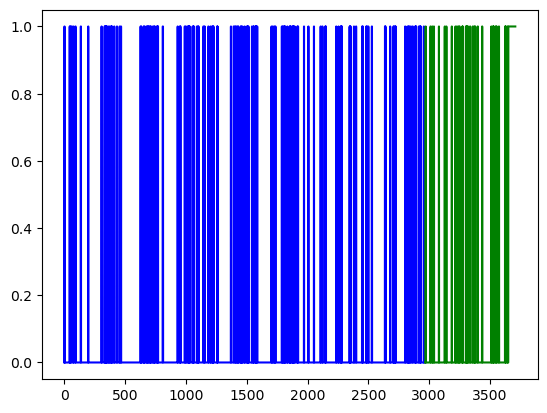

In [206]:
#hago un plot de x_train y x_test
plt.plot(X_train['offset days'], y_train, color='blue', label='Train')
plt.plot(X_test['offset days'], y_test, color='green', label='Test')

In [207]:
X_train

,offset days,valor_previo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Enero,Febrero,...,Septiembre,Octubre,Noviembre,lluvia_acumulada_semana,lluvia_acumulada_mes,lluvia_media_3d,lluvia_media_7d,lluvia_media_30d,lluvia_std_7d,lluvia_std_30d
0,0,0.0,0,1,0,0,0,0,1,0,...,0,0,0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000
1,1,0.0,0,0,1,0,0,0,1,0,...,0,0,0,0.3,0.3,0.15,0.150000,0.150000,0.000000,0.000000
2,2,0.3,0,0,0,1,0,0,1,0,...,0,0,0,0.3,0.3,0.10,0.100000,0.100000,0.212132,0.212132
3,3,0.0,0,0,0,0,1,0,1,0,...,0,0,0,0.3,0.3,0.10,0.075000,0.075000,0.173205,0.173205
4,4,0.0,0,0,0,0,0,1,1,0,...,0,0,0,0.3,0.3,0.00,0.060000,0.060000,0.150000,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,2963,0.0,0,0,0,1,0,0,0,1,...,0,0,0,0.8,0.8,0.00,0.114286,0.026667,0.302372,0.146059
2964,2964,0.0,0,0,0,0,1,0,0,1,...,0,0,0,0.0,0.8,0.00,0.000000,0.026667,0.302372,0.146059
2965,2965,0.0,0,0,0,0,0,1,0,1,...,0,0,0,0.0,0.8,0.00,0.000000,0.026667,0.000000,0.146059
2966,2966,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0.0,0.8,0.00,0.000000,0.026667,0.000000,0.146059


In [208]:
y_train

0       0
1       1
2       0
3       0
4       0
       ..
2963    0
2964    0
2965    0
2966    0
2967    0
Name: llueve, Length: 2968, dtype: int64

In [209]:
# Paso 3: Configurar el experimento en MLflow
mlflow.set_experiment("Clasificacion_Lluvia")

# Paso 4: Entrenar múltiples modelos y registrarlos en MLflow
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# Paso 5: Iterar sobre los modelos y entrenarlos
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"Entrenando modelo: {model_name}")

        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Realizar predicciones
        y_pred = model.predict(X_test)


        # Calcular la matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Evaluar el modelo
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Registrar el modelo y las métricas en MLflow
        mlflow.log_param("Modelo", model_name)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 Score", f1)

        # Guardar la matriz de confusión como una imagen
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.savefig(f'confusion_matrix_{model_name}.png')
        plt.close()

        # Registrar la matriz de confusión como un artefacto en MLflow
        mlflow.log_artifact(f'confusion_matrix_{model_name}.png')



        print(f"{model_name} | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

print("¡Entrenamiento y registro completado!")

Entrenando modelo: RandomForest
RandomForest | Accuracy: 0.9084, Precision: 0.9086, Recall: 0.9084, F1 Score: 0.8947
🏃 View run RandomForest at: http://localhost:8080/#/experiments/964539996084675361/runs/74f0afe8e57c42668b7aa607377e3d6e
🧪 View experiment at: http://localhost:8080/#/experiments/964539996084675361
Entrenando modelo: LogisticRegression


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression | Accuracy: 0.8989, Precision: 0.9045, Recall: 0.8989, F1 Score: 0.8788
🏃 View run LogisticRegression at: http://localhost:8080/#/experiments/964539996084675361/runs/40304111f66c4345973cfbe4e0de55cf
🧪 View experiment at: http://localhost:8080/#/experiments/964539996084675361
Entrenando modelo: XGBoost
XGBoost | Accuracy: 0.9151, Precision: 0.9165, Recall: 0.9151, F1 Score: 0.9034
🏃 View run XGBoost at: http://localhost:8080/#/experiments/964539996084675361/runs/fae6f008e1f94a7884727c019257e926
🧪 View experiment at: http://localhost:8080/#/experiments/964539996084675361
Entrenando modelo: CatBoost
CatBoost | Accuracy: 0.9191, Precision: 0.9193, Recall: 0.9191, F1 Score: 0.9093
🏃 View run CatBoost at: http://localhost:8080/#/experiments/964539996084675361/runs/5e29431a46a24774bbef135a711c2c9b
🧪 View experiment at: http://localhost:8080/#/experiments/964539996084675361
¡Entrenamiento y registro completado!


In [211]:
# Definir la cuadrícula de hiperparámetros para la búsqueda
param_grid = {
    "iterations": [50, 100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [5, 6, 10],
}

# Configurar MLflow
mlflow.set_experiment("Optimización_CatBoost_Lluvia")


# Iterar sobre todas las combinaciones de parámetros
for params in [dict(zip(param_grid, x)) for x in itertools.product(*param_grid.values())]:

    # Crear un nuevo modelo con los parámetros actuales
    modelo = CatBoostClassifier(random_state=42, verbose=0, **params)

    # Entrenar el modelo
    modelo.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = modelo.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Registrar el modelo y las métricas en MLflow
    mlflow.end_run()  # End any active run before starting a new one
    with mlflow.start_run(run_name=f"CatBoost - {params}"):
        mlflow.log_params(params)
        mlflow.log_metric("Accuracy", accuracy)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 Score", f1)

        # Guardar la matriz de confusión como una imagen
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Matriz de Confusión - {params}')
        plt.savefig(f'confusion_matrix_{params}.png')
        plt.close()

        # Registrar la matriz de confusión como un artefacto en MLflow
        mlflow.log_artifact(f'confusion_matrix_{params}.png')

        # Registrar el modelo en MLflow
        mlflow.catboost.log_model(modelo, f"modelo_catboost_{params}")

        print(f"Combinación de parámetros {params} | Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

print("¡Entrenamiento y registro completado!")

2025/02/27 14:54:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.01, 'depth': 5} | Accuracy: 0.8976, Precision: 0.8936, Recall: 0.8976, F1 Score: 0.8816
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/4d8e1b4d5ef745f09fa9c3a5976d9781
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:54:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.01, 'depth': 6} | Accuracy: 0.9057, Precision: 0.9072, Recall: 0.9057, F1 Score: 0.8903
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/534e1477f73b46c3bc02a7b7a43f235f
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:54:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.01, 'depth': 10} | Accuracy: 0.8976, Precision: 0.8926, Recall: 0.8976, F1 Score: 0.8824
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/5e614d39009247448f4c15d1a2c8ee4c
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:54:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.05, 'depth': 5} | Accuracy: 0.9111, Precision: 0.9125, Recall: 0.9111, F1 Score: 0.8978
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/3063647defb242769dd35c3c0a009873
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:54:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.05, 'depth': 6} | Accuracy: 0.9111, Precision: 0.9140, Recall: 0.9111, F1 Score: 0.8972
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/a8dcfb93f7444c318c7a36ae01548095
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.05, 'depth': 10} | Accuracy: 0.9030, Precision: 0.8996, Recall: 0.9030, F1 Score: 0.8892
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/7a7e9eedec534055b47d1df14fdcbd74
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.1, 'depth': 5} | Accuracy: 0.9151, Precision: 0.9178, Recall: 0.9151, F1 Score: 0.9028
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/bda874fa67ca43cd9635aac5b4195730
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.1, 'depth': 6} | Accuracy: 0.9070, Precision: 0.9072, Recall: 0.9070, F1 Score: 0.8929
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/e8aa2ca771304661bb60e312fbd0a495
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 50, 'learning_rate': 0.1, 'depth': 10} | Accuracy: 0.9124, Precision: 0.9098, Recall: 0.9124, F1 Score: 0.9021
🏃 View run CatBoost - {'iterations': 50, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/36948292e6704071be687c4e7eff6eb2
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.01, 'depth': 5} | Accuracy: 0.8989, Precision: 0.8988, Recall: 0.8989, F1 Score: 0.8813
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/5856d1d7e74348998142b02ae1bd3102
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.01, 'depth': 6} | Accuracy: 0.9151, Precision: 0.9178, Recall: 0.9151, F1 Score: 0.9028
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/94bed4be268c4177a2e9ea8d9a41d518
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.01, 'depth': 10} | Accuracy: 0.8976, Precision: 0.8959, Recall: 0.8976, F1 Score: 0.8801
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/99d19ebe807e4042ae1cbcaa38df8bb1
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.05, 'depth': 5} | Accuracy: 0.9137, Precision: 0.9165, Recall: 0.9137, F1 Score: 0.9009
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/acc2906afd83449b849ec21e808dfe15
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.05, 'depth': 6} | Accuracy: 0.9137, Precision: 0.9152, Recall: 0.9137, F1 Score: 0.9015
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/4492e8671b7546f7b8eaf754cad81f2f
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.05, 'depth': 10} | Accuracy: 0.9070, Precision: 0.9049, Recall: 0.9070, F1 Score: 0.8942
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/11866547cd774f7999c52a506a11ef69
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.1, 'depth': 5} | Accuracy: 0.9205, Precision: 0.9228, Recall: 0.9205, F1 Score: 0.9101
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/7dca21a9b030448193e1376d16b44501
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.1, 'depth': 6} | Accuracy: 0.9070, Precision: 0.9049, Recall: 0.9070, F1 Score: 0.8942
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/a0a1ed907c774067bc39690564bb6975
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 100, 'learning_rate': 0.1, 'depth': 10} | Accuracy: 0.9124, Precision: 0.9138, Recall: 0.9124, F1 Score: 0.8997
🏃 View run CatBoost - {'iterations': 100, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/fa3b34ca8f5743c0a1ffd8c1da915e91
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.01, 'depth': 5} | Accuracy: 0.9111, Precision: 0.9156, Recall: 0.9111, F1 Score: 0.8965
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/b469cc5fd73f448faa5d81df99d7b225
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.01, 'depth': 6} | Accuracy: 0.9164, Precision: 0.9205, Recall: 0.9164, F1 Score: 0.9040
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/dc9255b0382e47859322139c30efeba1
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.01, 'depth': 10} | Accuracy: 0.9016, Precision: 0.9016, Recall: 0.9016, F1 Score: 0.8852
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/6002b7ec10604c6baf4a7d393ead6390
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.05, 'depth': 5} | Accuracy: 0.9178, Precision: 0.9180, Recall: 0.9178, F1 Score: 0.9075
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/2be5f7c1f02d4027823c656a0ff358a4
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.05, 'depth': 6} | Accuracy: 0.9178, Precision: 0.9191, Recall: 0.9178, F1 Score: 0.9070
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/fed9ec7b50db45949ae91de96c925c39
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.05, 'depth': 10} | Accuracy: 0.9097, Precision: 0.9069, Recall: 0.9097, F1 Score: 0.8985
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/25a7d49580bc42d89d59852d0cf2834e
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.1, 'depth': 5} | Accuracy: 0.9164, Precision: 0.9157, Recall: 0.9164, F1 Score: 0.9063
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/1e1c1405678f4f31a6a6e1cb5362fa9a
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.1, 'depth': 6} | Accuracy: 0.9084, Precision: 0.9047, Recall: 0.9084, F1 Score: 0.8972
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/a9dfb736cebc43adb480d30fa002d0aa
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 200, 'learning_rate': 0.1, 'depth': 10} | Accuracy: 0.9097, Precision: 0.9099, Recall: 0.9097, F1 Score: 0.8966
🏃 View run CatBoost - {'iterations': 200, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/307e076679c54488894e6d3fa60e8803
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.01, 'depth': 5} | Accuracy: 0.9151, Precision: 0.9178, Recall: 0.9151, F1 Score: 0.9028
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/bb2e26644a164c09a0314c93f700d988
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.01, 'depth': 6} | Accuracy: 0.9191, Precision: 0.9204, Recall: 0.9191, F1 Score: 0.9088
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/ee483207354448b092569e533eec8e4a
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.01, 'depth': 10} | Accuracy: 0.9097, Precision: 0.9088, Recall: 0.9097, F1 Score: 0.8972
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/dc1d548915f047948d01e1eb865969c3
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.05, 'depth': 5} | Accuracy: 0.9205, Precision: 0.9207, Recall: 0.9205, F1 Score: 0.9111
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/c480cdc1fa754cfd9e865237a3b31277
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:55:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.05, 'depth': 6} | Accuracy: 0.9137, Precision: 0.9140, Recall: 0.9137, F1 Score: 0.9021
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/938dabf36aaa46c3af2f157dac2a6662
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.05, 'depth': 10} | Accuracy: 0.9151, Precision: 0.9121, Recall: 0.9151, F1 Score: 0.9061
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/2e0798134e334d8db1703dedcb9fb8ab
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.1, 'depth': 5} | Accuracy: 0.9178, Precision: 0.9180, Recall: 0.9178, F1 Score: 0.9075
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/1ebb256e2a5d47e09c5279265296594e
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.1, 'depth': 6} | Accuracy: 0.9124, Precision: 0.9106, Recall: 0.9124, F1 Score: 0.9015
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/b3a41653ba444b2fbe207f4ad97a38c9
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 500, 'learning_rate': 0.1, 'depth': 10} | Accuracy: 0.9124, Precision: 0.9116, Recall: 0.9124, F1 Score: 0.9009
🏃 View run CatBoost - {'iterations': 500, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/535259d8794341a08832460f8ddf65c0
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.01, 'depth': 5} | Accuracy: 0.9191, Precision: 0.9216, Recall: 0.9191, F1 Score: 0.9083
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/941d97e26fe047788960a379a699842b
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6} | Accuracy: 0.9205, Precision: 0.9217, Recall: 0.9205, F1 Score: 0.9106
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/21b2f73458844db694822a9c0d32034f
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.01, 'depth': 10} | Accuracy: 0.9097, Precision: 0.9069, Recall: 0.9097, F1 Score: 0.8985
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/76aaaf0ce68645558ab92eaf7bef7557
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.05, 'depth': 5} | Accuracy: 0.9232, Precision: 0.9243, Recall: 0.9232, F1 Score: 0.9141
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/b44512c1684644f19ae74518b4c50be3
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.05, 'depth': 6} | Accuracy: 0.9124, Precision: 0.9116, Recall: 0.9124, F1 Score: 0.9009
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/5c81d24cac584c849a1716eca76cea25
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.05, 'depth': 10} | Accuracy: 0.9124, Precision: 0.9098, Recall: 0.9124, F1 Score: 0.9021
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.05, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/5390c18d899446789f78847d4a344a99
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.1, 'depth': 5} | Accuracy: 0.9191, Precision: 0.9193, Recall: 0.9191, F1 Score: 0.9093
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 5} at: http://localhost:8080/#/experiments/662932298426931957/runs/cd3f3fc7b93c4287b0e305bb72ea58be
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.1, 'depth': 6} | Accuracy: 0.9111, Precision: 0.9084, Recall: 0.9111, F1 Score: 0.9003
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 6} at: http://localhost:8080/#/experiments/662932298426931957/runs/9453893201ac4936a7505d1bdfd300b7
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957


2025/02/27 14:56:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Combinación de parámetros {'iterations': 1000, 'learning_rate': 0.1, 'depth': 10} | Accuracy: 0.9124, Precision: 0.9116, Recall: 0.9124, F1 Score: 0.9009
🏃 View run CatBoost - {'iterations': 1000, 'learning_rate': 0.1, 'depth': 10} at: http://localhost:8080/#/experiments/662932298426931957/runs/908c2155d5a14661b2f7ab7c0b13c8d8
🧪 View experiment at: http://localhost:8080/#/experiments/662932298426931957
¡Entrenamiento y registro completado!


In [265]:
# Dividir los datos en X (características) y y (etiqueta)
X = df_lluvia.drop(columns=['valor', 'fecha_observacion', 'llueve'])
y = df_lluvia['llueve']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [229]:
# el modelo elegido fue el de CatBoost con los siguientes hiperparametros
# Modelo CatBoost - {'iterations': 1000, 'learning_rate': 0.01, 'depth': 6}
params = {'iterations': 1000, 'learning_rate': 0.05, 'depth': 5}

# Crear un nuevo modelo con los hiperparámetros seleccionados
modelo = CatBoostClassifier(random_state=42, verbose=0, **params)
#guardo el modelo
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
modelo.save_model("modelo_catboost_lluvia")

In [258]:
#max columns al maximo
pd.set_option('display.max_columns', None)

In [266]:
X_test

,offset days,valor_previo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,lluvia_acumulada_semana,lluvia_acumulada_mes,lluvia_media_3d,lluvia_media_7d,lluvia_media_30d,lluvia_std_7d,lluvia_std_30d
2968,2968,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.8,0.000000,0.000000,0.026667,0.000000,0.146059
2969,2969,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.8,0.000000,0.000000,0.026667,0.000000,0.146059
2970,2970,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.8,0.000000,0.000000,0.026667,0.000000,0.146059
2971,2971,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.8,0.000000,0.000000,0.026667,0.000000,0.146059
2972,2972,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2.8,3.6,0.933333,0.400000,0.120000,0.000000,0.146059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705,3705,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.6,64.6,1.433333,1.228571,2.153333,0.677882,4.233176
3706,3706,3.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,50.1,1.400000,1.000000,1.670000,1.096531,3.487983
3707,3707,0.4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.6,37.2,1.266667,0.800000,1.240000,1.075484,2.535289
3708,3708,0.2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.1,41.9,2.900000,1.871429,1.396667,1.075484,1.343849
